Лабораторная работа №6


In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pylab as plt
from operator import itemgetter
import pylab


# 1. Загрузите данные ex6data1.mat из файла.

mat = loadmat('ex6data1.mat')
X = pd.DataFrame(mat['X'])


In [2]:
# 2. Реализуйте функцию случайной инициализации K центров кластеров.

def random_center(x: pd.DataFrame, k: int) -> np.ndarray:
    randoms = []
    for i in range(len(x.columns)):
        col = x.iloc[:, i]
        randoms.append(np.random.uniform(col.min(), col.max(), k))
    return np.array(list(zip(*randoms)))

In [3]:
# 3. Реализуйте функцию определения принадлежности к кластерам.

def check_cluster_belong(centers: np.ndarray, x) -> int:
    distance = [ np.sum((x - center) ** 2) for center in centers]
    return min(enumerate(distance), key=itemgetter(1))[0] + 1

In [4]:
# 4. Реализуйте функцию пересчета центров кластеров.

def recalculate_centers(x: np.ndarray, k: int, prev: np.ndarray) -> np.ndarray:
    centers = []
    for i in range(k):
        required = x[x[:, -1] == i + 1][:, :-1]
        if required.tolist():
            centers.append(required.mean(axis=0).tolist())
        else:
            centers.append(prev[i].tolist())
    return np.array(centers)

In [5]:
# 5. Реализуйте алгоритм K-средних.

def k_means_alghoritm(x: pd.DataFrame, k: int, iterations=20):
    centers = random_center(x, k)
    steps = [centers]
    columns = list(range(len(x.columns)))
    data = x.copy().to_numpy()
    for i in range(iterations):
        data = data[:, columns]
        cluster_belongs = np.apply_along_axis(lambda row: check_cluster_belong(centers, row), 1, data).reshape(len(x), 1)
        data = np.concatenate((data, cluster_belongs), axis=1)
        centers = recalculate_centers(data, k, centers)
        steps.append(centers)
    return data, centers, steps

def calculate_cost(data: np.ndarray, centers: np.ndarray):
    columns = list(range(data[0].size - 1))
    return np.apply_along_axis(lambda row: ((row[columns] - centers[int(row[-1]) - 1]) ** 2).sum(), 1, data).sum()

def clusterize_k_means(x: pd.DataFrame, k: int, iterations=100, iterations_alghoritm=20):
    result = None
    result_steps = None
    result_cost = None
    for i in range(iterations):
        data, centers, steps = k_means_alghoritm(x, k, iterations=iterations_alghoritm)
        cost = calculate_cost(data, centers)
        if (result_cost is None or result_cost > cost):
            result_cost = cost
            result_steps = steps
            result = data
    return result, result_steps, result_cost

result, result_steps, _ = clusterize_k_means(X, 3)

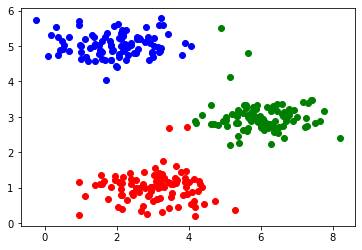

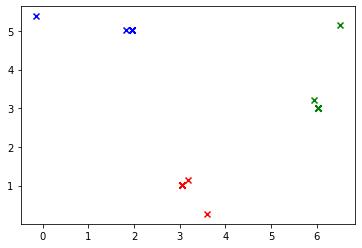

In [6]:
# 6. Постройте график, на котором данные разделены на K=3 кластеров (при помощи различных маркеров или цветов), а также траекторию движения центров кластеров в процессе работы алгоритма

data = result[result[:, -1] == 1]
plt.scatter(data[:, 0], data[:, 1], c="green")
data = result[result[:, -1] == 2]
plt.scatter(data[:, 0], data[:, 1], c="red")
data = result[result[:, -1] == 3]
plt.scatter(data[:, 0], data[:, 1], c="blue")
plt.show()

steps = np.array(list(map(lambda k: k[0], result_steps)))
plt.scatter(steps[:, 0], steps[:, 1], c="green", marker="x")
steps = np.array(list(map(lambda k: k[1], result_steps)))
plt.scatter(steps[:, 0], steps[:, 1], c="red", marker="x")
steps = np.array(list(map(lambda k: k[2], result_steps)))
plt.scatter(steps[:, 0], steps[:, 1], c="blue", marker="x")

plt.show()

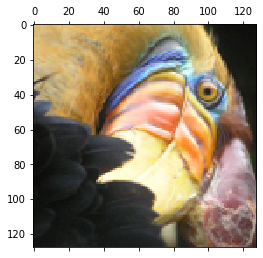

In [7]:
# 7. Загрузите данные bird_small.mat из файла.
mat = loadmat('bird_small.mat')
shape = mat["A"].shape
X = pd.DataFrame(mat["A"].reshape(shape[0] * shape[1], shape[2]))

plt.matshow(mat["A"])
plt.show()

In [8]:
# 8. С помощью алгоритма K-средних используйте 16 цветов для кодирования пикселей.

result, result_steps, _ = clusterize_k_means(X, 16, iterations=10)
result_steps = result_steps[len(result_steps) - 1]

value_0 = np.vectorize(lambda value: result_steps[value - 1][0])(result[:, 3]).reshape(result.shape[0], 1)
value_1 = np.vectorize(lambda value: result_steps[value - 1][1])(result[:, 3]).reshape(result.shape[0], 1)
value_2 = np.vectorize(lambda value: result_steps[value - 1][2])(result[:, 3]).reshape(result.shape[0], 1)

result_coded = np.concatenate([value_0, value_1, value_2], axis=1).astype(np.uint8)

Общий размер в памяти не кодированных пикселей: 49264. Размер кодированного цветов пикселей: 16640
Cоотношение оригинальной к кодированной: 2.960576923076923
Качество изображения ухудшилось


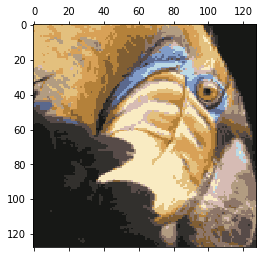

In [9]:
# 9. Насколько уменьшился размер изображения? Как это сказалось на качестве?

original = X.to_numpy().copy().__sizeof__()
coded = result[:, 3].astype(np.uint8).__sizeof__() + result_steps.astype(np.uint8).__sizeof__()

print(f"Общий размер в памяти не кодированных пикселей: {original}. Размер кодированного цветов пикселей: {coded}")
print(f"Cоотношение оригинальной к кодированной: {original/coded}")

plt.matshow(result_coded.reshape(shape[0], shape[1], shape[2]))
plt.show()

print("Качество изображения ухудшилось")

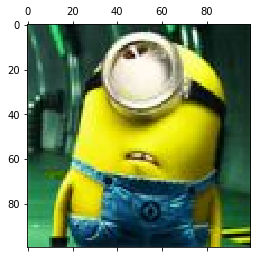

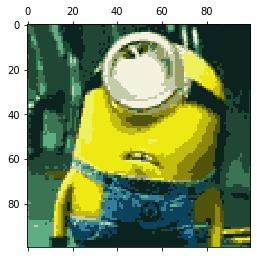

In [10]:
# 10. Реализуйте алгоритм K-средних на другом изображении.

img = pylab.imread('minion.jpg')
shape = img.shape
X = pd.DataFrame(img.reshape(shape[0] * shape[1], shape[2]))

plt.matshow(img)
plt.show()

result, result_steps, result_cost = clusterize_k_means(X, 16, iterations=10)
result_steps = result_steps[len(result_steps) - 1]

value_0 = np.vectorize(lambda value: result_steps[value - 1][0])(result[:, 3]).reshape(result.shape[0], 1)
value_1 = np.vectorize(lambda value: result_steps[value - 1][1])(result[:, 3]).reshape(result.shape[0], 1)
value_2 = np.vectorize(lambda value: result_steps[value - 1][2])(result[:, 3]).reshape(result.shape[0], 1)

result_coded = np.concatenate([value_0, value_1, value_2], axis=1).astype(np.uint8)

plt.matshow(result_coded.reshape(shape[0], shape[1], shape[2]))
plt.show()

In [11]:
# 11. Реализуйте алгоритм иерархической кластеризации на том же изображении. Сравните полученные результаты.

def prepare_means(points: np.ndarray, means: np.ndarray, cluster_remove: int, cluster_update: int) -> np.ndarray:
    result = means[means[:, -1] != cluster_remove]
    points[points[:, -1] == cluster_remove, -1] = cluster_update
    new_row = points[points[:, -1] == cluster_update].mean(axis=0)
    result[result[:, -1] == cluster_update] = new_row
    return result

def find_nearest(means: np.ndarray):
    lowest = None
    cluster_update = None
    cluster_remove = None
    for index, mean in enumerate(means[:-1]):
        req_means = means[index + 1:]
        diff = req_means - mean
        distance_eq = np.linalg.norm(diff[:, :-1], axis=1)
        arg_min = distance_eq.argmin()
        if lowest is None or distance_eq[arg_min] < lowest:
            lowest = distance_eq[arg_min]
            cluster_update = mean[-1]
            cluster_remove = req_means[arg_min, -1]
    return cluster_update, cluster_remove


points = X.copy()
points.insert(3, 3, X.index + 1)
points = points.to_numpy().astype(np.double)

for k, i in enumerate(np.unique(points[:, :-1], axis=0)):
    points[(points[:,0] == i[0]) & (points[:, 1] == i[1]) & (points[:, 2] == i[2]), -1] = k + 1

means = np.unique(points, axis=0)
while len(means) > 16:
    cluster_update, cluster_remove = find_nearest(means)
    means = prepare_means(points, means, cluster_remove, cluster_update)

for k in range(len(means)):
    cluster = means[k][-1]
    points[points[:, -1] == cluster, -1] = k + 1

cost = calculate_cost(points, means[:, :-1])

print(f"Потери при иерархической кластеризации выше {cost} > {result_cost}. Иерархическая кластеризация вычисляется медленее.")

Потери при иерархической кластеризации выше 10731234.205557775 > 7028051.160395563. Иерархическая кластеризация вычисляется медленее.
